Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from datetime import datetime as dt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
rcParams['figure.figsize'] = 11,7

In [3]:
# indexData.csv - это файл с сайта kaggle.com, статистика по основным биржевым ETF'ам американского фондового рынка (цена открытия, закрытия, high, low, процент изменения от предыдущего дня, торговый объем)

In [4]:
index_data = pd.read_csv('indexData.csv')[['Index', 'Date', 'Volume']]

index_data['Date_mod'] = index_data.apply(lambda row: int(row['Date'].split('-')[0]), axis=1)
index_data['Volume'] = index_data['Volume'].astype('float64')

# До 1996 года в документе информации практически нет, там почти что одни NaN, поэтому я их удалил 

index_data = index_data.loc[index_data['Date_mod'] > 1995]

In [5]:
index_data.head()

,Index,Date,Volume,Date_mod
7551,NYA,1996-01-02,0.0,1996
7552,NYA,1996-01-03,0.0,1996
7553,NYA,1996-01-04,0.0,1996
7554,NYA,1996-01-05,0.0,1996
7555,NYA,1996-01-08,0.0,1996


In [6]:
# Сгруппировал данные по тикеру и году, вычислил средний уровень дневного объема торговли (гипотеза о постепенном росте дневного объема торговли от года к году) для каждого года, сделал сводную таблицу

index_data_groupped = index_data[['Index', 'Volume', 'Date_mod']].groupby(['Index', 'Date_mod']).median(numeric_only=True).round(2)

pt = pd.pivot_table(index_data_groupped, index='Date_mod', columns='Index')

pt['Volume']

Index,000001.SS,399001.SZ,GDAXI,GSPTSE,HSI,IXIC,J203.JO,KS11,N100,N225,NSEI,NYA,SSMI,TWII
Date_mod,,,,,,,,,,,,,,
1996,NaN,NaN,0.0,86620000.0,0.0,546315000.0,NaN,27250.0,NaN,0.0,NaN,0.0,0.0,NaN
1997,0.0,0.0,0.0,5241050000.0,0.0,637480000.0,NaN,38800.0,NaN,0.0,NaN,0.0,0.0,0.0
1998,0.0,0.0,0.0,6474710000.0,0.0,777650000.0,NaN,81500.0,NaN,0.0,NaN,0.0,0.0,0.0
1999,0.0,0.0,0.0,6372410000.0,0.0,1012635000.0,NaN,280300.0,0.0,0.0,NaN,0.0,0.0,0.0
2000,0.0,0.0,37176550.0,8755390000.0,0.0,1706985000.0,NaN,295700.0,0.0,0.0,NaN,0.0,0.0,0.0
2001,0.0,0.0,59005000.0,10238460000.0,0.0,1854935000.0,NaN,439100.0,0.0,0.0,NaN,1215200000.0,0.0,0.0
2002,0.0,0.0,79952400.0,11627765000.0,221629000.0,1692325000.0,NaN,740950.0,0.0,38600000.0,NaN,1380600000.0,0.0,0.0
2003,7500.0,0.0,97722900.0,12126790000.0,235562200.0,1663730000.0,NaN,506400.0,0.0,64600000.0,NaN,1388550000.0,50952100.0,3560800.0
2004,12800.0,14100.0,90095200.0,12346820000.0,299312200.0,1740195000.0,NaN,364500.0,0.0,74900000.0,NaN,1422700000.0,46785100.0,3789100.0


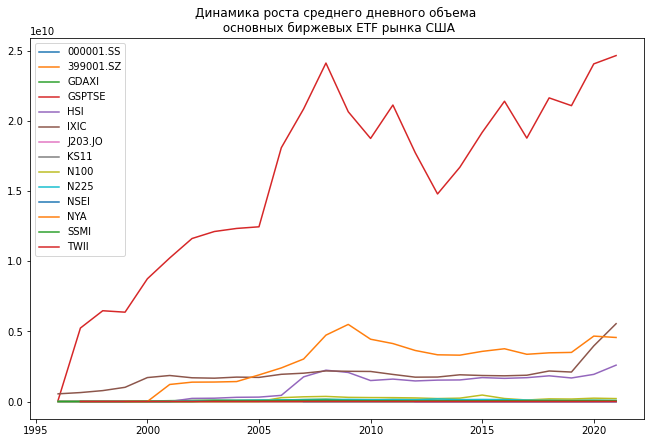

In [7]:
# Линейный график роста среднего дневного объема основных биржевых ETF рынка США

plt.plot(pt['Volume'])
plt.title('Динамика роста среднего дневного объема \n основных биржевых ETF рынка США')
plt.legend(pt['Volume'].columns)
plt.show()

In [8]:
# ---------------------  АНАЛИЗ ДАННЫХ ИЗ ПРЕДЫДУЩЕГО ДЗ (об исходах лечения лошадей) ---------------------

In [9]:
horse_data = pd.read_csv('horse_data_clean.csv')
horse_data.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.3,40,24,1,3,1
1,1,2,39.1,164,84,4,2,2
2,2,1,38.4,72,32,2,2,1
3,1,1,37.9,48,16,1,3,1
4,2,1,38.0,80,36,3,4,3


In [19]:
# ---------------------   HEATMAP  -----------------------------

# Словари для расшифровки цифровых данных из таблицы

pain = {
    1: '01.В ясном сознании, боли нет',
    2: '02.Животное угнетено',
    3: '03.Преходящая легкая боль',
    4: '04.Преходящая сильная боль',
    5: '05.Постоянная сильная боль'
}

outcome = {
    1: '01.Животное \n выжило',
    2: '02.Животное \n погибло',
    3: '03.Животное было \n подвергнуто эвтаназии'
}

# Скопировал данные и добавил в них новые столбцы pain_val, outcome_val, с расшифровкой цифровых данных:

pain_data = horse_data.copy()[['pain', 'outcome']]

for k, v in pain.items():
    pain_data.loc[pain_data['pain'] == k, 'pain_val'] = v

for k, v in outcome.items():
    pain_data.loc[pain_data['outcome'] == k, 'outcome_val'] = v

# Сделал сводную таблицу по степени выраженности болевого синдрома у лошадей и исхода заболевания (выздоровление\эвтаназия\летальный исход)

pain_pivot_table = pd.pivot_table(pain_data[['pain', 'pain_val', 'outcome_val']], index='pain_val', columns='outcome_val', aggfunc=np.count_nonzero)

pain_pivot_table['pain']

outcome_val,01.Животное \n выжило,02.Животное \n погибло,03.Животное было \n подвергнуто эвтаназии
pain_val,,,
"01.В ясном сознании, боли нет",33,2,1
02.Животное угнетено,29,13,11
03.Преходящая легкая боль,50,8,4
04.Преходящая сильная боль,8,15,10
05.Постоянная сильная боль,11,23,4


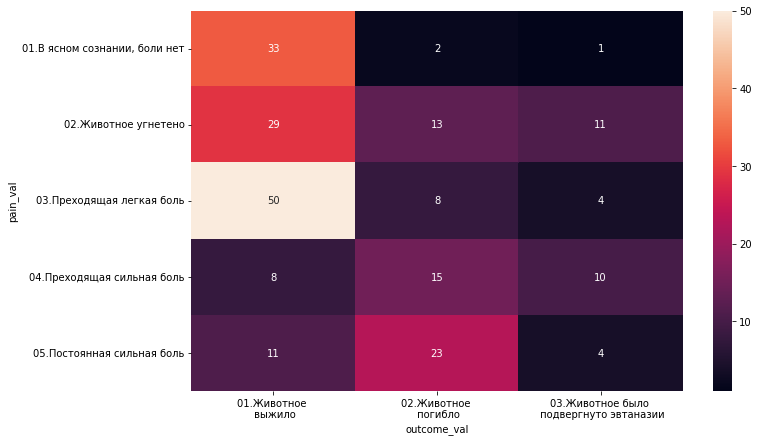

In [20]:
# собственно таблица HEATMAP:
# По какой-то причине не получилось отсортировать данные сводной таблицы по степени выраженности болевого синдрома. Я попробовал сделать
# это при помощи команды sort=['pain'].sort(), также пробовал просто sort=['pain'], без эффекта. Сортировка происходит по алфавиту.
# Поэтому пришлось записать в значения словаря цифры перед значениями.

sns.heatmap(pain_pivot_table['pain'], annot=True, )
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

In [21]:
# Как видно из хитмапа, существует зависимость между степенью выраженности болевого синдрома и исходом заболевания: среди выживших животных преходящую или постоянную 
# сильную боль испытывали лишь 19 лошадей (14,5%), тогда как среди погибших и подвергшихся эвтаназии животных преходящую или постоянную сильную боль испытывали 
# 38 (62,3%) и 14 (46,7%) животных соответственно. Напротив, большинство выживших животных испытывали легкую боль из первых трех категорий (85,5%).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


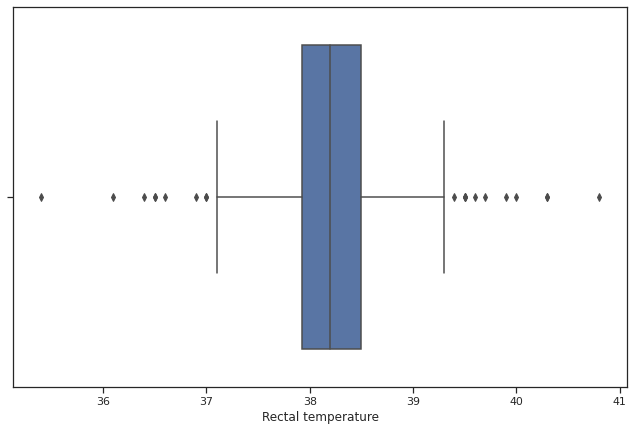

In [40]:
# ---------------------  BOXPLOT НА ПРИМЕРЕ ДАННЫХ ИЗМЕРЕНИЯ РЕКТАЛЬНОЙ ТЕМПЕРАТУРЫ У ЖИВОТНЫХ ---------------------

# Только почему-то в Google Colab отображается горизонтально, а в PyCharm - вертикально.


fig, ax = plt.subplots()
sns.set_theme(style="ticks")
sns.boxplot(horse_data['rectal_temperature'], x='rectal_temperature')
plt.xlabel('Rectal temperature')
plt.show()

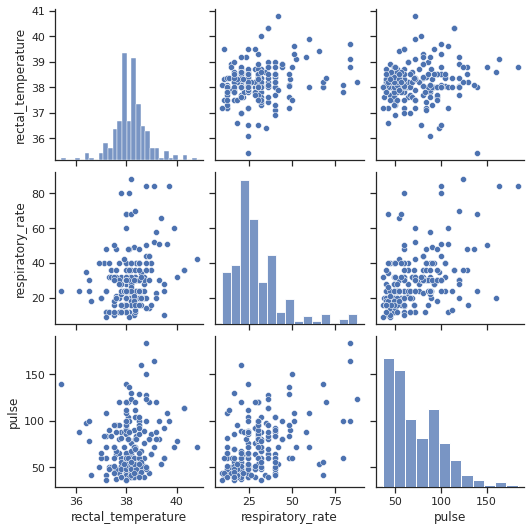

In [41]:
# ------------------  SCATTERPLOT MATRIX  -----------------------

sns.pairplot(horse_data[['rectal_temperature', 'respiratory_rate', 'pulse']])
plt.show()

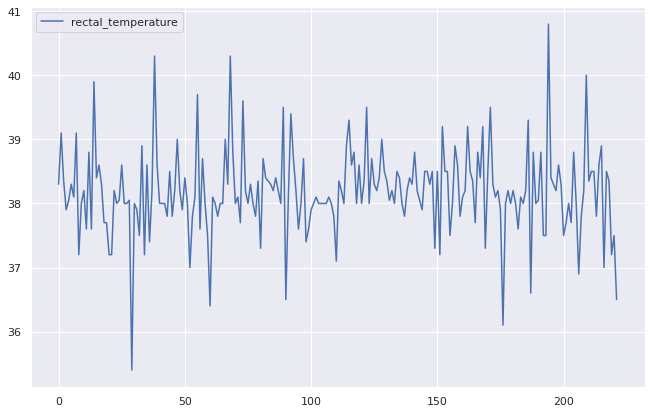

In [42]:
# ------------------   LINE CHARTS   ------------------

sns.set_theme()
plt.plot(horse_data['rectal_temperature'])
plt.legend(['rectal_temperature'])
plt.show()

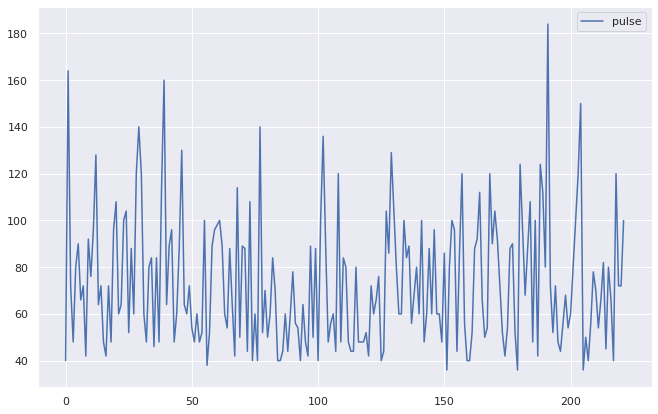

In [43]:
plt.plot(horse_data['pulse'])
plt.legend(['pulse'])
plt.show()

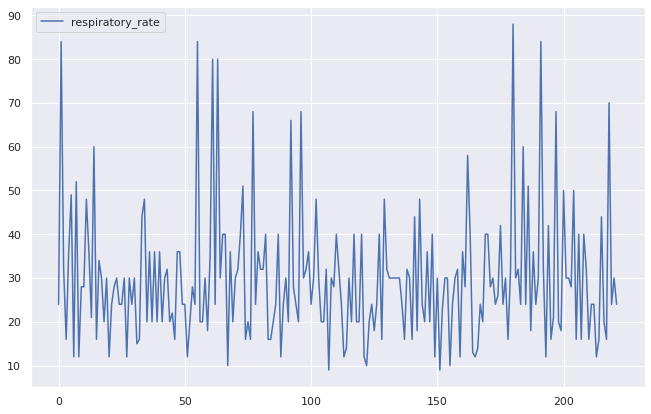

In [44]:
plt.plot(horse_data['respiratory_rate'])
plt.legend(['respiratory_rate'])
plt.show()

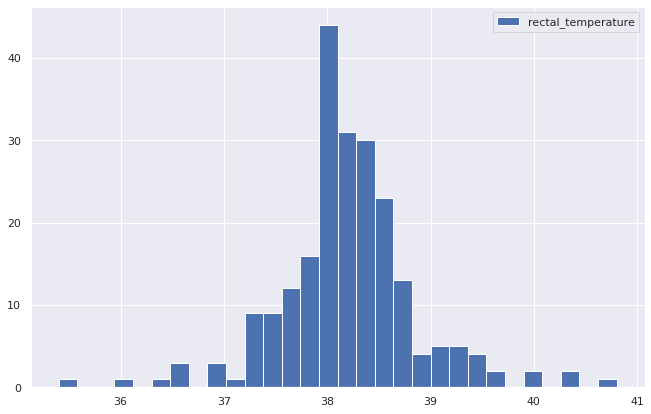

In [45]:
# --------------------  ГИСТОГРАММЫ  -------------------------

sns.set_theme()
plt.hist(horse_data['rectal_temperature'], bins=30)
plt.legend(['rectal_temperature'])
plt.show()

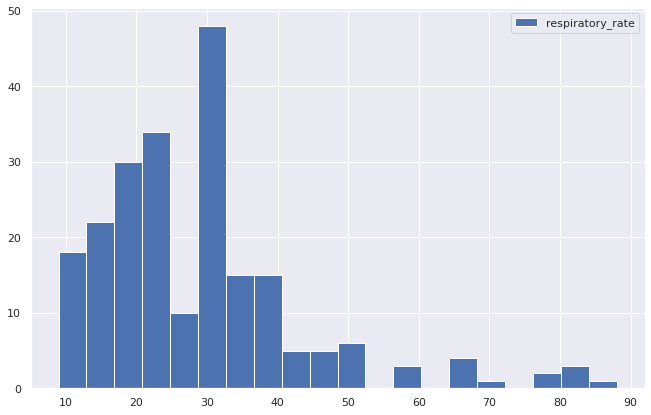

In [46]:
plt.hist(horse_data['respiratory_rate'], bins=20)
plt.legend(['respiratory_rate'])
plt.show()